In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import time
%matplotlib inline
import math
os.chdir('C:\\Users\\agastya1208\\Downloads')

Using TensorFlow backend.


In [2]:
np.random.seed(3)

In [3]:
def sigmoid(z):
    sigm = 1/(1+np.exp(-z))
    return sigm
def tanh(z):
    tanh = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    return tanh
def relu(z):
    relu = np.maximum(0, z)
    return relu

#### 1 Hidden Layer - Tanh and Output layer - Sigmoid

In [4]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y
def initialize_params(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    params = {'w1': w1,
             'b1': b1,
             'w2': w2,
             'b2': b2}
    return params
def forprop(X, params):
    w1 = params['w1']
    b1 = params['b1']
    w2 = params['w2']
    b2 = params['b2']
    z1 = np.dot(w1, X) + b1
    a1 = tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    cache = {'a1': a1,
            'a2': a2}
    return cache
def cost_func(Y, cache):
    m = Y.shape[1]
    a2 = cache['a2']
    cost = (-np.sum(np.multiply(Y, np.log(a2)) + np.multiply((1-Y), np.log(1-a2))))/(m)
    np.squeeze(cost)
    return cost
def backprop(X, Y, cache, params):
    a2 = cache['a2']
    a1 = cache['a1']
    m = Y.shape[1]
    w2 = params['w2']
    w1 = params['w1']
    dz2 = a2 - Y
    dw2 = (np.dot(dz2, a1.T))/m
    db2 = (np.sum(dz2, axis=1, keepdims = True))/m
    dz1 = np.dot(w2.T, dz2)*(1 - np.power(a1, 2))
    dw1 = (np.dot(dz1, X.T))/m
    db1 = (np.sum(dz1, axis=1, keepdims = True))/m
    grads = {'dw2': dw2,
            'db2': db2,
            'dw1': dw1,
            'db1': db1}
    return grads
def grad_descent(params, grads, learning_rate):
    w1 = params['w1']
    w2 = params['w2']
    b1 = params['b1']
    b2 = params['b2']
    dw1 = grads['dw1']
    dw2 = grads['dw2']
    db1 = grads['db1']
    db2 = grads['db2']
    w1 = w1 - (learning_rate*dw1)
    b1 = b1 - (learning_rate*db1)
    w2 = w2 - (learning_rate*dw2)
    b2 = b2 - (learning_rate*db2)
    params = {'w1': w1,
             'b1': b1,
             'w2': w2,
             'b2': b2}
    return params
def predict(X, Y, params):
    cache = forprop(X, params)
    a2 = cache['a2']
    m = Y.shape[1]
    predictions = np.zeros((1, m))
    for i in range(m):
        if a2[0][i]>0.5:
            predictions[0][i] = 1
        else:
            predictions[0][i] = 0
    acc = 0
    for i in range(m):
        if predictions[0][i] == Y[0][i]:
            acc += 1
    acc_percent = acc/m
    return acc_percent
def nn(X_train, Y_train, X_test=0, Y_test=0, n_h = 6, learning_rate = 1.2, num_iterations = 10000, plot_graph = True, print_cost = True, test = False, print_coeff = False):
    n_x, n_y = layer_sizes(X_train, Y_train)
    params = initialize_params(n_x, n_h, n_y)
    costs = []
    for i in range(num_iterations):
        cache = forprop(X_train, params)
        cost = cost_func(Y_train, cache)
        grads = backprop(X_train, Y_train, cache, params)
        params = grad_descent(params, grads, learning_rate)
        if print_cost == True and i%1000 == 0:
            print('After %dth iteration, the cost is: %f'%(i, cost))
        if plot_graph == True and i%10 == 0:
            costs.append(cost)
    train_percent = predict(X_train, Y_train, params)
    if print_coeff == True:
        print('W2: ', params['w2'])
        print('b2: ', params['b2'])
    if test == True:
        test_percent = predict(X_test, Y_test, params)
        print('Test set accuracy: %f'%(test_percent*100))
    if plot_graph == True:
        plt.plot(np.squeeze(costs))
        plt.ylabel('Cost')
        plt.xlabel('Iterations (per tens)')
        plt.title("Learning rate = " + str(learning_rate))
    print('Training set accuracy: %f'%(train_percent*100))

In [5]:
def plot(X, Y):
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
data1 = np.genfromtxt('Gaussian1_X.csv', delimiter=',')
data2 = np.genfromtxt('Gaussian1_Y.csv', delimiter=',')
p = data2.shape[0]
X1 = np.transpose(data1)
Y1 = np.transpose(data2)
Y1 = Y1.reshape(p,1)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X1, Y1, test_size = 0.2, stratify=Y1)
xtrain = np.transpose(xtrain)
xtest = np.transpose(xtest)
ytrain = np.transpose(ytrain)
ytest = np.transpose(ytest)

Test set accuracy: 92.500000
Training set accuracy: 99.375000


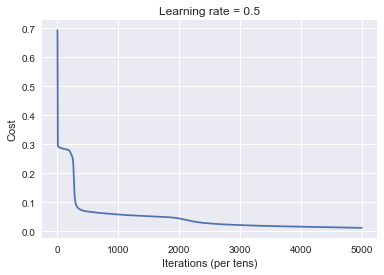

In [7]:
nn(xtrain, ytrain, xtest, ytest, test=True, print_cost = False, n_h = 20, learning_rate = 0.5, num_iterations=50000)

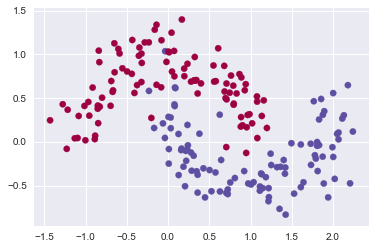

In [7]:
plot(data1, data2)

#### L hidden layers - Linear-->RELU/tanh-->Sigmoid

In [8]:
def initialize_params_deep(X, Y, init):
    n1 = input("Enter number of layers: ")
    layer_dims = []
    layer_dims.append(X.shape[0])
    for i in range(int(n1)):
        n2 = input("Enter number of hidden units in layer %s: "%(i+1))
        layer_dims.append(int(n2))
    parameters = {}
    initializer = 0.01
    for i in range(1, len(layer_dims)):
        if init == 'he':
            initializer = np.sqrt(2/layer_dims[i-1])
        parameters['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1])*initializer
        parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))
    return parameters
def forprop_deep(X, parameters, activation, keep_prob):
    caches = []
    A = X
    L = len(parameters)//2
    for i in range(L-1):
        A_prev = A
        W = parameters['W' + str(i+1)]
        b = parameters['b' + str(i+1)]
        Z = np.dot(W, A_prev) + b
        if activation == 'relu':
            A = relu(Z)
        elif activation == 'tanh':
            A = tanh(Z)
        D = np.random.rand(A.shape[0], A.shape[1])
        D = D<keep_prob
        A = A*D
        A = A/keep_prob
        cache = (A_prev, Z, W, b, D)
        caches.append(cache)
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    ZL = np.dot(W, A) + b
    AL = sigmoid(ZL)
    D = 0
    cache = (A, ZL, W, b, D)
    caches.append(cache)
    return AL, caches
def cost_function_deep(X, Y, AL, lambd, parameters):
    m = Y.shape[1]
    cross_entropy_cost = (-np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log(1 - AL))))/(m)
    regularization_cost = 0
    for i in range(len(parameters)//2):
        regularization_cost += np.sum(np.square(parameters['W' + str(i+1)]))
    regularization_cost = regularization_cost*(lambd/(2*m))
    cost = cross_entropy_cost + regularization_cost
    return cost
def backprop_deep(X, Y, caches, AL, parameters, learning_rate, activation, lambd, keep_prob):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    m_ = X.shape[1]
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    A_prev = caches[L-1][0]
    ZL = caches[L-1][1]
    W = caches[L-1][2]
    s = 1/(1+np.exp(-ZL))
    dZL = dAL* s * (1-s)
    m = A_prev.shape[1]
    D = caches[L-2][4]
    grads["dW" + str(L)] = np.dot(dZL, A_prev.T)/m
    grads["db" + str(L)] = np.sum(dZL, axis=1, keepdims = True)/m
    dA_prev = np.dot(W.T, dZL)
    D = D<keep_prob
    dA_prev = dA_prev*D
    dA_prev = dA_prev/keep_prob
    grads["dA" + str(L-1)] = dA_prev
    for i in reversed(range(L-1)):
        A_prev = caches[i][0]
        Z = caches[i][1]
        W = caches[i][2]
        D = caches[i-1][4]
        dA = grads['dA' + str(i+1)]
        if activation == 'relu':
            dZ = np.array(dA, copy=True)
            dZ[Z <= 0] = 0
        elif activation == 'tanh':
            s = tanh(Z)
            dZ = dA*(1 - np.power(s, 2))
        m = A_prev.shape[1]
        dW_temp = np.dot(dZ, A_prev.T)/m
        db_temp = np.sum(dZ, axis=1, keepdims = True)/m
        dA_prev_temp = np.dot(W.T, dZ)
        D = D<keep_prob
        dA_prev_temp = dA_prev_temp*D
        dA_prev_temp = dA_prev_temp/keep_prob
        grads["dA" + str(i)] = dA_prev_temp
        grads["dW" + str(i + 1)] = dW_temp + (lambd/m_)*(parameters['W' + str(i+1)])
        grads["db" + str(i + 1)] = db_temp
    for i in range(L):
        parameters['W' + str(i+1)] = parameters['W' + str(i+1)] - learning_rate*grads['dW'+str(i+1)]
        parameters['b' + str(i+1)] = parameters['b' + str(i+1)] - learning_rate*grads['db'+str(i+1)]
    return parameters
def predict_deep(X, Y, parameters, activation):
    keep_prob = 1
    AL, caches = forprop_deep(X, parameters, activation, keep_prob)
    m = Y.shape[1]
    predictions = np.zeros((1, m))
    for i in range(m):
        if AL[0][i] > 0.5:
            predictions[0][i] = 1
        else:
            predictions[0][i] = 0
    acc = 0
    for i in range(m):
        if predictions[0][i] == Y[0][i]:
            acc += 1
    acc_score = (acc/m)*100
    return acc_score
def deep_nn(X, Y, X_test=0, Y_test=0, init = 0, num_iterations = 10000, learning_rate = 0.2, lambd = 0,
            print_cost = True, plot_graph = True, activation = 'relu', print_coeff = False, test = False,
            keep_prob=1):
    parameters = initialize_params_deep(X, Y, init)
    costs = []
    for i in range(num_iterations):
        AL, caches = forprop_deep(X, parameters, activation, keep_prob)
        if print_cost == True and i%1000 == 0:
            print("After %dth iteration, the cost is: %f"%(i, cost_function_deep(X, Y, AL, lambd, parameters)))
        parameters = backprop_deep(X, Y, caches, AL, parameters, learning_rate, activation, lambd, keep_prob)
        if plot_graph == True and i%10 == 0:
            costs.append(cost_function_deep(X, Y, AL, lambd, parameters))
    L = len(parameters)//2
    if print_coeff == True:
        print('WL: ', parameters['W' + str(L)])
        print('bL: ', parameters['b' + str(L)])
    if plot_graph == True:
        plt.plot(np.squeeze(costs))
        plt.ylabel('Cost')
        plt.xlabel('Iterations (per tens)')
        plt.title("Learning rate = " + str(learning_rate))
    train_percent = predict_deep(X, Y, parameters, activation)
    print('Training set accuracy: %f'%(train_percent))
    if test == True:
        test_percent = predict_deep(X_test, Y_test, parameters, activation)
        print('Test set accuracy: %f'%(test_percent))
    return parameters

In [230]:
prms = deep_nn(xtrain, ytrain, xtest, ytest, test = True, init='he', num_iterations=200000, 
               learning_rate=0.0001, plot_graph = True, print_cost=True, activation = 'relu', 
               lambd = 0)

Enter number of layers: 3
Enter number of hidden units in layer 1: 20
Enter number of hidden units in layer 2: 40
Enter number of hidden units in layer 3: 1
After 0th iteration, the cost is: 0.885167
After 1000th iteration, the cost is: 0.786686
After 2000th iteration, the cost is: 0.729189
After 3000th iteration, the cost is: 0.688240
After 4000th iteration, the cost is: 0.654907
After 5000th iteration, the cost is: 0.626434
After 6000th iteration, the cost is: 0.601751
After 7000th iteration, the cost is: 0.580228
After 8000th iteration, the cost is: 0.561381
After 9000th iteration, the cost is: 0.544809
After 10000th iteration, the cost is: 0.530174
After 11000th iteration, the cost is: 0.517193
After 12000th iteration, the cost is: 0.505627
After 13000th iteration, the cost is: 0.495276
After 14000th iteration, the cost is: 0.485971
After 15000th iteration, the cost is: 0.477573
After 16000th iteration, the cost is: 0.469963
After 17000th iteration, the cost is: 0.463040
After 1800

KeyboardInterrupt: 

Enter number of layers: 2
Enter number of hidden units in layer 1: 20
Enter number of hidden units in layer 2: 1
Training set accuracy: 86.875000
Test set accuracy: 85.000000


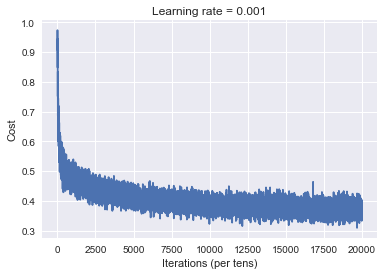

In [70]:
'''prms = deep_nn(xtrain, ytrain, xtest, ytest, test = True, init='he', 
               num_iterations=200000, learning_rate=0.001, plot_graph = True, 
               print_cost=False, activation = 'tanh', lambd = 1, keep_prob = 0.5)

Test set accuracy: 85.000000
Training set accuracy: 87.500000


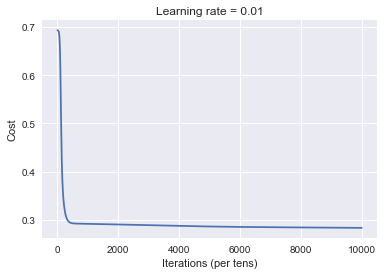

In [38]:
'''nn(xtrain, ytrain, xtest, ytest, test = True, num_iterations= 100000, learning_rate = 0.01, 
   print_cost = False, n_h=20)

In [9]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
def predict_dec(parameters, X):
    a3, cache = forprop_deep(X, parameters, activation='tanh', keep_prob=1)
    predictions = (a3>0.5)
    return predictions
def plot_dec(xtrain, ytrain, prms):
    plt.title("Plot")
    axes = plt.gca()
    axes.set_xlim([-1.5,1.5])
    axes.set_ylim([-1.5,1.5])
    plot_decision_boundary(lambda x: predict_dec(prms, x.T), xtrain, ytrain)

--> Implement normalize_input() 

--> Implement Bengio random initialization

--> Tensorflow Gradient Checking

--> Implement:

            ** Stochastic Gradient Descent
            
            ** Mini Batch Gradient Descent
            
            ** Gradient Descent with Momentum
            
            ** RMSprop
            
            ** ADAM

In [10]:
p = tf.Variable(0, dtype=tf.float32)
cost = tf.add(tf.add(p**2, tf.multiply(-10.,p)), 25)
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(p))

0.0


In [11]:
session.run(train)

In [12]:
print(session.run(p))

0.1


In [13]:
for i in range(10000):
    session.run(train)
print(session.run(p))

4.99999


In [14]:
a = tf.constant(30)
b = tf.constant(20)
c = tf.multiply(a, b)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(c))

600


In [15]:
os.chdir("C:\\Users\\agastya1208\\Desktop\\Events")

In [16]:
data = pd.read_csv('train.csv')

In [17]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y = data['label']

In [19]:
Y = np.array(Y)
Y.reshape(1,42000)

array([[1, 0, 1, ..., 7, 6, 9]], dtype=int64)

In [20]:
data = data.drop('label', axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [22]:
data = np.array(data)
data = data.reshape(784, 42000)

In [43]:
def model(X1, Y1, learning_rate=0.0001, num_epochs=50, minibatch_size=64, print_cost = True, plot_cost=True, L=3, m=42000):
    seed = 1
    X = tf.placeholder(tf.float64, name='X')
    Y = tf.placeholder(tf.float64, name='Y')
    parameters = {}
    parameters['W1'] = tf.get_variable(dtype=tf.float64, name = 'W1', shape=[20, 784], initializer=tf.contrib.layers.xavier_initializer())
    parameters['b1'] = tf.get_variable(dtype=tf.float64, name = 'b1', shape=[20, 1], initializer=tf.zeros_initializer())
    parameters['W2'] = tf.get_variable(dtype=tf.float64, name = 'W2', shape=[40, 20], initializer=tf.contrib.layers.xavier_initializer())
    parameters['b2'] = tf.get_variable(dtype=tf.float64, name = 'b2', shape=[40, 1], initializer=tf.zeros_initializer())
    parameters['W3'] = tf.get_variable(dtype=tf.float64, name = 'W3', shape=[10, 40], initializer=tf.contrib.layers.xavier_initializer())
    parameters['b3'] = tf.get_variable(dtype=tf.float64, name = 'b3', shape=[10, 1], initializer=tf.zeros_initializer())
    Z1 = tf.add(tf.matmul(parameters['W1'], X), parameters['b1'], name='Z1')
    A1 = tf.nn.relu(Z1, name='A1')
    Z2 = tf.add(tf.matmul(parameters['W2'], A1), parameters['b2'], name='Z2')
    A2 = tf.nn.relu(Z2, name='A2')
    Z3 = tf.add(tf.matmul(parameters['W3'], A2), parameters['b3'], name='Z3')
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=labels))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        costs = []
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            seed = seed+1
            minibatches = []
            np.random.seed(seed)
            permutation = list(np.random.permutation(m))
            shuffled_X = X1[:, permutation]
            shuffled_Y = Y1[:, permutation].reshape(10, m)
            num_complete_minibatches = math.floor(m/minibatch_size)
            for i in range(num_complete_minibatches):
                minibatch_X = shuffled_X[:,i*minibatch_size:(i+1)*minibatch_size]
                minibatch_Y = shuffled_Y[:, i*minibatch_size:(i+1)*minibatch_size]
                minibatch = (minibatch_X, minibatch_Y)
                minibatches.append(minibatch)
            if m%minibatch_size != 0:
                minibatch_X = shuffled_X[:, num_complete_minibatches*minibatch_size:]
                minibatch_Y = shuffled_Y[:, num_complete_minibatches*minibatch_size:]
                minibatch = (minibatch_X, minibatch_Y)
                minibatches.append(minibatch)
            num_minibatches = len(minibatches)
            for minibatch in minibatches:
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X:minibatch[0], Y:minibatch[1]})
                epoch_cost += minibatch_cost
            epoch_cost = epoch_cost/num_minibatches
            if print_cost == True and epoch%10 == 0:
                print('After Epoch %d, cost is: %f'%(epoch, epoch_cost))
            if plot_cost == True and epoch%10 == 0:
                costs.append(epoch_cost)
        if plot_cost == True:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
        return parameters

After Epoch 0, cost is: 9.394766
After Epoch 10, cost is: 2.294992
After Epoch 20, cost is: 2.226765
After Epoch 30, cost is: 2.186979
After Epoch 40, cost is: 2.157016


{'W1': <tf.Variable 'W1:0' shape=(20, 784) dtype=float64_ref>,
 'W2': <tf.Variable 'W2:0' shape=(40, 20) dtype=float64_ref>,
 'W3': <tf.Variable 'W3:0' shape=(10, 40) dtype=float64_ref>,
 'b1': <tf.Variable 'b1:0' shape=(20, 1) dtype=float64_ref>,
 'b2': <tf.Variable 'b2:0' shape=(40, 1) dtype=float64_ref>,
 'b3': <tf.Variable 'b3:0' shape=(10, 1) dtype=float64_ref>}

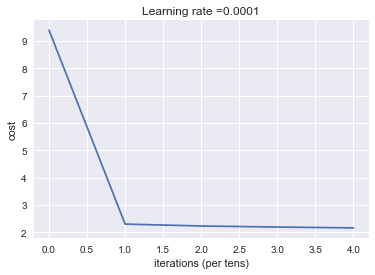

In [44]:
tf.reset_default_graph() 
model(data, Y_he)

In [23]:
Y_he = np.zeros((10, 42000))

In [24]:
for i in range(42000):
    j = Y[i]
    Y_he[j][i] = 1

### Convolutional Neural Networks